In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [8]:
print("Head: ", df.head())

Head:     RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4     

In [9]:
print("Shape: ", df.shape)

Shape:  (10000, 14)


In [60]:
print("Distribution of target variables: ", df.Exited.value_counts())

Distribution of target variables:  Exited
0    7963
1    2037
Name: count, dtype: int64


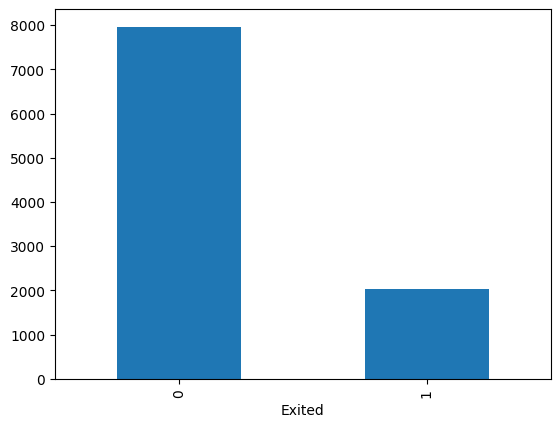

In [57]:
df.Exited.value_counts().plot(kind="bar")
plt.show()

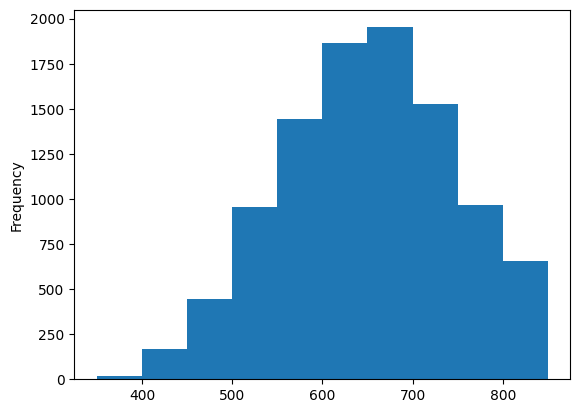

In [58]:
df.CreditScore.plot(kind="hist")
plt.show()

<Axes: ylabel='Frequency'>

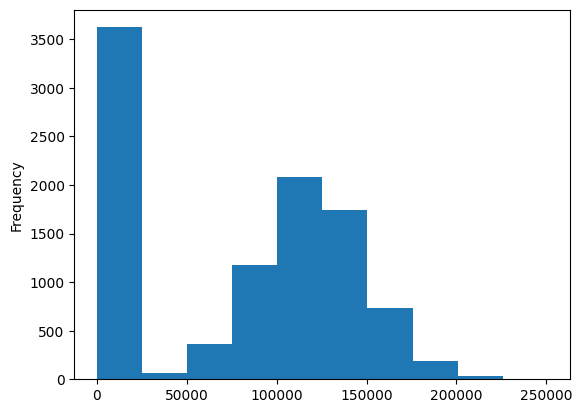

In [59]:
df.Balance.plot(kind="hist")

<Axes: ylabel='Frequency'>

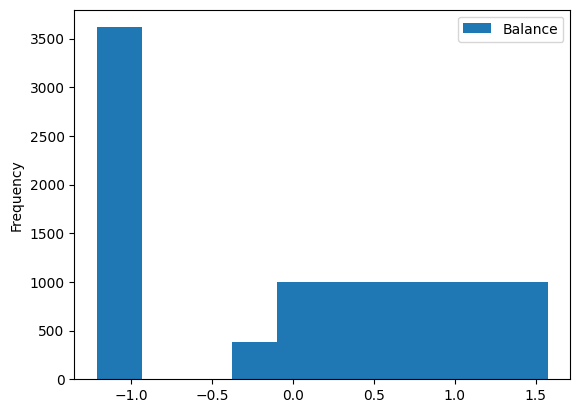

In [41]:
Balance_new = QuantileTransformer().fit_transform(df[["Balance"]])

Balance_new_scaled = StandardScaler().fit_transform(Balance_new)
Balance_new_df = pd.DataFrame(Balance_new_scaled, columns=["Balance"])
Balance_new_df.plot(kind="hist")

<Axes: ylabel='Frequency'>

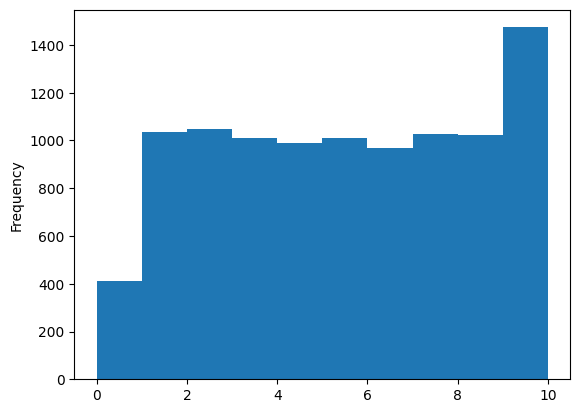

In [53]:
df.Tenure.plot(kind="hist")

<Axes: ylabel='Frequency'>

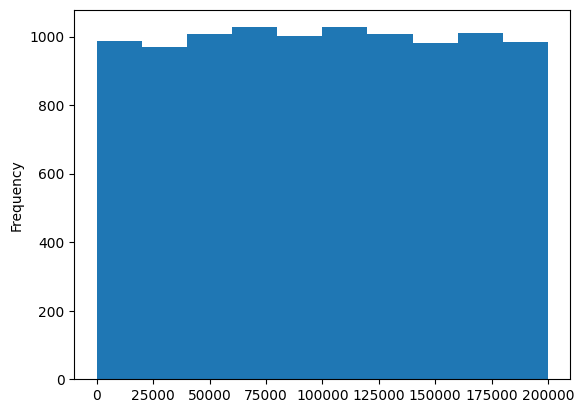

In [54]:
df.EstimatedSalary.plot(kind="hist")

In [72]:
df.columns

Index(['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

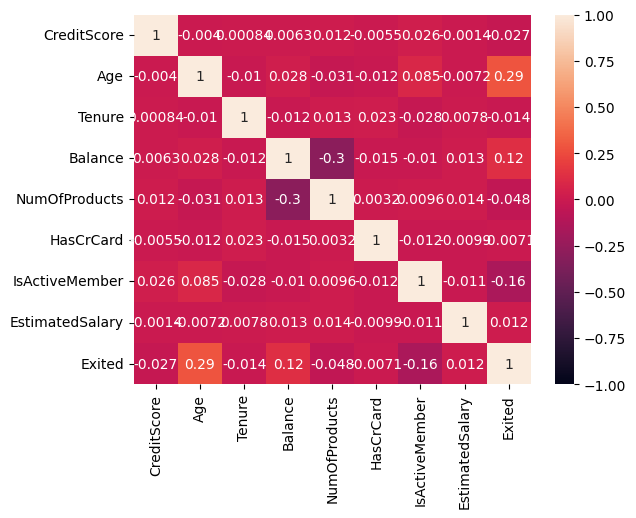

In [9]:
columns_drop = ["RowNumber", "CustomerId", "Geography", "Surname", "Gender"]
df = df.drop(columns_drop, axis=1)
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
plt.show

<Axes: ylabel='Frequency'>

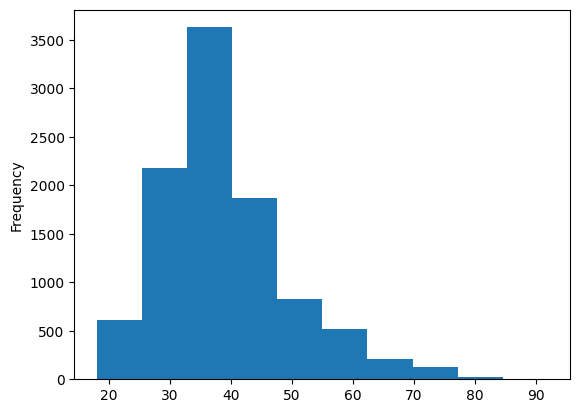

In [4]:
df.Age.plot(kind="hist")

<Axes: ylabel='Frequency'>

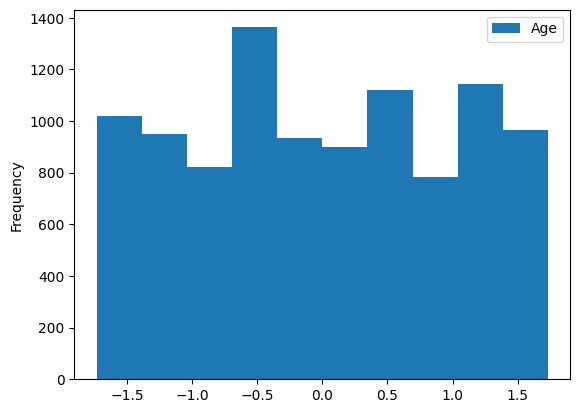

In [5]:
Age_new = QuantileTransformer().fit_transform(df[["Age"]])

Age_new_scaled = StandardScaler().fit_transform(Age_new)
Age_new_df = pd.DataFrame(Age_new_scaled, columns=["Age"])

Age_new_df.plot(kind="hist")

In [10]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

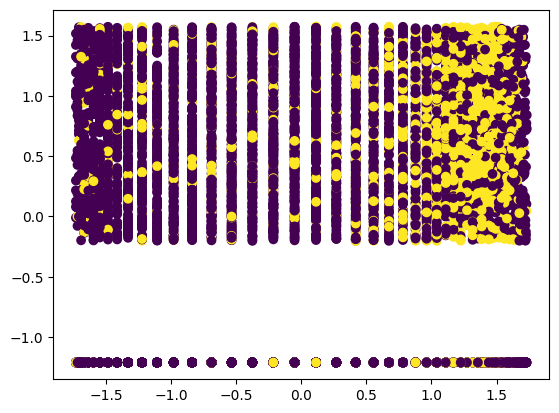

In [27]:
X = df[["Age", "Balance", "Tenure", ]].values
y = df["Exited"]

X_scaled = QuantileTransformer().fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)